In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
x, y = np.array(mnist['data']), np.array(mnist['target'])

In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

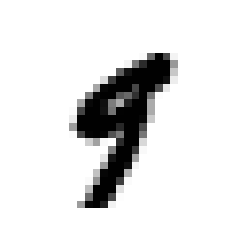

In [11]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [12]:
y[36000]

'9'

In [13]:
x_train, x_test = x[:60000], x[60000:]

In [14]:
y_train, y_test = y[:60000], y[60000:]

In [15]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## creating a 2 detector

In [16]:
#classifier
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [17]:
y_train

array([9, 2, 8, ..., 0, 1, 1], dtype=int8)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(tol = 0.1, solver="lbfgs")

In [20]:
clf.fit(x_train, y_train_2)

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [21]:
clf.predict([some_digit])

array([False])

In [22]:
#cv=3 will make group of 3
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [23]:
a.mean()

0.9171999999999999

In [24]:
# if not 2 Y_train_not 2 =( y_train!=2 )

In [43]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

## calculating confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_train_2, y_train_pred)

array([[53543,   499],
       [  846,  5112]], dtype=int64)

In [46]:
confusion_matrix(y_train_2, y_train_2)

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## precision and recall

In [47]:
from sklearn.metrics import precision_score, recall_score

In [48]:
precision_score(y_train_2, y_train_pred)

0.9110675458919979

In [49]:
recall_score(y_train_2, y_train_pred)

0.8580060422960725

In [51]:
from sklearn.metrics import f1_score

In [52]:
f1_score(y_train_2, y_train_pred)

0.8837410320684589

## precision recall curve

In [53]:
from sklearn.metrics import precision_recall_curve

In [58]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [59]:
y_scores

array([-13.21480757,   8.73464417,  -5.58840843, ..., -11.28596774,
        -4.95628444,  -4.45054741])

In [63]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [64]:
precisions

array([0.1014473 , 0.101432  , 0.10143373, ..., 1.        , 1.        ,
       1.        ])

In [65]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [66]:
thresholds

array([-23.027467  , -23.02486029, -23.02263083, ...,  17.58169351,
        19.52374702,  19.8005002 ])

## plotting precision recall curve

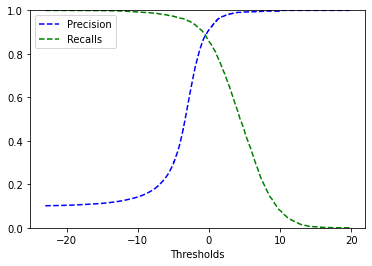

In [68]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g--", label = "Recalls")
plt.xlabel("Thresholds")
plt.legend(loc = "upper left")
plt.ylim([0,1])
plt.show()